# Project: TMDb Data Analysis

By Amanda Zhou <br>
August 01, 2020

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> **Background and Objective**: A success movie plays an important role of discovery and communication for audience. As far as the film company is concerned, gaining tremendous profit is what they attach importance to. Therefore, in this project, we will explore which genres are most popular from year to year, and what kinds of properties (such as budget and popularity) are associated with movies that have high revenues.


> **Data Resource**: This data set contains information about 10,000 movies published between 1960 and 2015, which collected from The Movie Database (TMDb) and included user ratings and revenue. It was also cleaned from original data on Kaggle by Udacity.

> **Data Description**:<br>
> id: ID of the movie <br>
> imdb_id: IMDb ID of the movie on IMDb <br>
> popularity: Popularity of the movie based on TMDb meetric, the higher the more popular <br>
> budget: Budget of the movie in dollars <br>
> revenue: Revenue of the movie in dollars <br>
> original_title: Original title of the movie <br>
> cast: A list of people who act in the movie <br>
> homepage: Webpage of the movie <br>
> director: Director of the movie <br>
> tagline: Slogan of the movie <br>
> keywords: Keywords about the movie <br>
> overview:A general description of the movie <br>
> runtime: Duration of the movie in minutes <br>
> genres : Movie categorization like 'Action', 'Adventure', 'Crime','Science Fiction', 'Thriller', ‘Family’, etc.<br>
> production_companies: A list of production companies of the movie <br>
> release_date: Release date of the movie <br>
> vote_count: Number of votes for the movie <br>
> vote_average: Rating of votes for the movie <br>
> release_year: Release year of the movie <br>
> budget_adj: The budget of the associated movie in terms of 2010 dollars, accounting for inflation over time <br>
> revenue_adj: The revenue of the associated movie in terms of 2010 dollars, accounting for inflation over time <br>

> **Research Questions**:<br>
> 1. Which genres of movies have been produced more?
> 2. Which genres are most popular from year to year?
> 3. Which genres have higher popularity?
> 4. Which genres have higher budget and revenue?
> 5. Which genres have higher profit?
> 6. Which genres have higher rating?
> 7. In general, does higher popularity have higher rating?
> 8. In general, does higher popularity have higher profit?

<a id='wrangling'></a>
## Data Wrangling


### General Properties

In [1]:
# import and load dataset

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

df = pd.read_csv('tmdb-movies.csv')
df.head(1)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09


In [2]:
df.shape

(10866, 21)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [4]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


### Dedupe Data

In [5]:
# print number of duplicates in thee dataset
print (df.duplicated().sum())

1


In [6]:
# drop duplicates in the dataset
df.drop_duplicates(inplace=True)

# print number of duplicates again to confirm deduple -> should be 0
print (df.duplicated().sum())

0


### Drop Extraneous Columns

In [7]:
# drop columns that we might not need for research questions about genres
df.drop(['id', 'imdb_id', 'budget', 'revenue', 'cast', 'director', 'production_companies', 'homepage', 'tagline', 'keywords', 'overview', 'runtime', 'release_date'], axis=1, inplace = True)


# rename the dataset and confirm changes
df_genres = df
df_genres.head(1)

,popularity,original_title,genres,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,Jurassic World,Action|Adventure|Science Fiction|Thriller,5562,6.5,2015,1.379999e+08,1.392446e+09


### Drop Rows with Missing Values

In [8]:
# view missing value count for each feature in the updated dataset
df_genres.isnull().sum()

popularity         0
original_title     0
genres            23
vote_count         0
vote_average       0
release_year       0
budget_adj         0
revenue_adj        0
dtype: int64

In [9]:
# drop rows with any null values in the updated dataset
df_genres.dropna(inplace = True)

# checks if any of columns in the genres dataset have null values -> should print False
df_genres.isnull().sum().any()

False

### Create A Gross Column

In [10]:
# Create variable gross which subtract budget_adj from revenue_adj -> might be profit (>0), loss(<0) or breakeven (=0)
# Using the data from budget_adj and revenue_adj instead of the data from budget and revenue, which accounting for inflation over time, in order to ensure comparability
df_genres['gross'] = df_genres['revenue_adj'] - df_genres['budget_adj']

# confirm changes
df_genres.head(1)

,popularity,original_title,genres,vote_count,vote_average,release_year,budget_adj,revenue_adj,gross
0,32.985763,Jurassic World,Action|Adventure|Science Fiction|Thriller,5562,6.5,2015,1.379999e+08,1.392446e+09,1.254446e+09


### Split Genres Column

In [11]:
# Split by "|" and create new entries for the corresponding movie
df_gs = df_genres.drop('genres', axis=1).join(df_genres['genres'].str.split('|', expand=True).stack().reset_index(level=1, drop=True).rename('genres'))


# check and view changes
df_gs.head(10)

,popularity,original_title,vote_count,vote_average,release_year,budget_adj,revenue_adj,gross,genres
0,32.985763,Jurassic World,5562,6.5,2015,1.379999e+08,1.392446e+09,1.254446e+09,Action
0,32.985763,Jurassic World,5562,6.5,2015,1.379999e+08,1.392446e+09,1.254446e+09,Adventure
0,32.985763,Jurassic World,5562,6.5,2015,1.379999e+08,1.392446e+09,1.254446e+09,Science Fiction
0,32.985763,Jurassic World,5562,6.5,2015,1.379999e+08,1.392446e+09,1.254446e+09,Thriller
1,28.419936,Mad Max: Fury Road,6185,7.1,2015,1.379999e+08,3.481613e+08,2.101614e+08,Action
1,28.419936,Mad Max: Fury Road,6185,7.1,2015,1.379999e+08,3.481613e+08,2.101614e+08,Adventure
1,28.419936,Mad Max: Fury Road,6185,7.1,2015,1.379999e+08,3.481613e+08,2.101614e+08,Science Fiction
1,28.419936,Mad Max: Fury Road,6185,7.1,2015,1.379999e+08,3.481613e+08,2.101614e+08,Thriller
2,13.112507,Insurgent,2480,6.3,2015,1.012000e+08,2.716190e+08,1.704191e+08,Adventure
2,13.112507,Insurgent,2480,6.3,2015,1.012000e+08,2.716190e+08,1.704191e+08,Science Fiction


In [12]:
# dimension after spliting
df_gs.shape

(26955, 9)

<a id='eda'></a>
## Exploratory Data Analysis


### Research Question 1: Which genres of movies have been produced more?

In [13]:
# total number of genres in the dataset
len (df_gs['genres'].unique())


20

In [14]:
# check and confirm if the number of original_title (movie names) are the same on both dataset since we will use as an unique identifier -> should be True
df.original_title.nunique() == df_gs.original_title.nunique()


True

In [15]:
# find and sort the total number of each movie genre with groupby 
df_genres_sum = df_gs.groupby('genres').original_title.nunique().sort_values(ascending=False)
df_genres_sum

genres
Drama              4672
Comedy             3750
Thriller           2841
Action             2339
Romance            1686
Horror             1580
Adventure          1442
Crime              1337
Family             1211
Science Fiction    1207
Fantasy             899
Mystery             796
Animation           697
Documentary         520
Music               403
History             331
War                 269
Foreign             188
TV Movie            167
Western             163
Name: original_title, dtype: int64

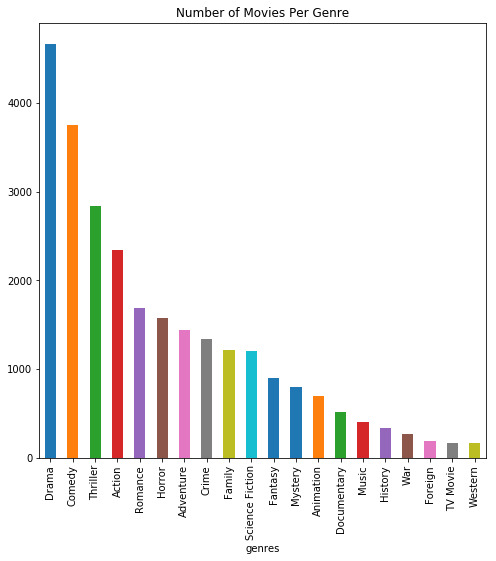

In [16]:
df_genres_sum.plot(kind = 'bar', title = 'Number of Movies Per Genre', figsize=(8, 8));

#### The top 3 genres of movie are Drama, Comedy and Thriller.

In [17]:
# calculate the number of movie genres for each year by using movie title as an unique identifier
df_genres_year = pd.DataFrame(df_gs.groupby(['release_year','genres'])['original_title'].nunique())
df_genres_year.head()

original_title
release_year genres                   
1960         Action                  8
             Adventure               5
             Comedy                  8
             Crime                   2
             Drama                  13

In [18]:
# group by the first level of the index and then get the first three elements from each group
group = df_genres_year['original_title'].groupby(level=0, group_keys=False)
group.nlargest(3)

release_year  genres   
1960          Drama         13
              Action         8
              Comedy         8
1961          Drama         16
              Comedy        10
              Action         7
1962          Drama         21
              Action         8
              Adventure      7
1963          Comedy        13
              Drama         13
              Thriller      10
1964          Drama         20
              Comedy        16
              Crime         10
1965          Drama         20
              Thriller      11
              Action         9
1966          Comedy        16
              Drama         16
              Action        14
1967          Comedy        17
              Drama         16
              Romance       11
1968          Drama         20
              Comedy         9
              Action         6
1969          Drama         13
              Comedy        12
              Action        10
                          ... 
2006          D

#### We can see that Comedy and Drama were produced the most year by year. The number of Thriller movies were increased remarkably in the current decade. This trend also reflects to the overall number of each movie genre.

### Research Question 2: Which genres are most popular  from year to year?

In [19]:
# calculate the average popularity per genre per year
df_gyp = pd.DataFrame(df_gs.groupby(['release_year','genres'])['popularity'].mean())
df_gyp.head()

popularity
release_year genres               
1960         Action       0.590724
             Adventure    0.700981
             Comedy       0.396000
             Crime        0.346480
             Drama        0.566305

In [20]:
# group by the first level of the index and then get the first largest element from each group
group_p = df_gyp['popularity'].groupby(level=0, group_keys=False)
group_p.nlargest(1)

release_year  genres         
1960          Thriller           0.811910
1961          Animation          2.631987
1962          Adventure          0.942513
1963          Animation          2.180410
1964          War                0.930959
1965          Music              0.968850
1966          Animation          0.585717
1967          Animation          1.348805
1968          Mystery            1.519456
1969          Crime              0.948020
1970          Animation          1.127718
1971          Family             1.530722
1972          Crime              1.072768
1973          Animation          0.956526
1974          Mystery            0.702035
1975          Adventure          0.880297
1976          Crime              0.707249
1977          Action             1.419319
1978          Music              0.679805
1979          Action             1.410014
1980          Science Fiction    0.897143
1981          Adventure          0.875815
1982          War                1.143183
1983

#### Before 2000, Animation Movies had higher popularity than others. However, Adventure, Westeern and Fantasy became the most popular movie genres in the current decade.

In [21]:
# try to figure out why those genres are more popular than others, we can assume it is profit related. 
# So calculate the average gross (in million for better visualization) per genre per year
df_gyg = pd.DataFrame(df_gs.groupby(['release_year','genres'])['gross'].mean()/1000000)
df_gyg.head()

gross
release_year genres              
1960         Action     46.915114
             Adventure   3.177749
             Comedy     38.772593
             Crime       0.000000
             Drama      60.794683

In [22]:
# group by the first level of the index and then get the first largest element from each group
group_g = df_gyg['gross'].groupby(level=0, group_keys=False)
group_g.nlargest(1)

release_year  genres         
1960          History              70.780488
1961          Animation          1545.635295
1962          Adventure           152.922094
1963          Action              106.800492
1964          Family              265.871931
1965          Music               531.202697
1966          War                  13.436029
1967          Animation           659.701348
1968          Mystery             160.651946
1969          Crime               187.143050
1970          War                 185.523576
1971          Action              131.507236
1972          Crime               225.750376
1973          Thriller            219.383642
1974          Western             255.165780
1975          Horror              291.309390
1976          Music               197.971065
1977          Science Fiction     356.980548
1978          Music               192.968289
1979          Adventure           168.003987
1980          Science Fiction     143.269746
1981          Adventure  

#### We can see Animation movies in 1961 have extremely high profit. Also, it is true that Adventure, Fantasy and Western movies have handsome profit in the current decade.

### Research Question 3: Which genres have higher popularity?

In [23]:
# for better comparison and visualization, we can calculate the mean for each variable 
df_genre_mean = df_gs.groupby(['genres']).mean()
df_genre_mean.head()

,popularity,vote_count,vote_average,release_year,budget_adj,revenue_adj,gross
genres,,,,,,,
Action,0.926274,392.993708,5.787752,2000.056208,3.296011e+07,9.175827e+07,5.879816e+07
Adventure,1.154259,513.125085,5.940585,1999.388851,4.393734e+07,1.416752e+08,9.773789e+07
Animation,0.852182,303.000000,6.403147,2003.995708,2.529535e+07,8.525613e+07,5.996078e+07
Comedy,0.592607,176.436330,5.905167,2000.816240,1.592031e+07,4.789700e+07,3.197669e+07
Crime,0.744930,278.805022,6.124889,1999.491137,2.153351e+07,5.663641e+07,3.510290e+07


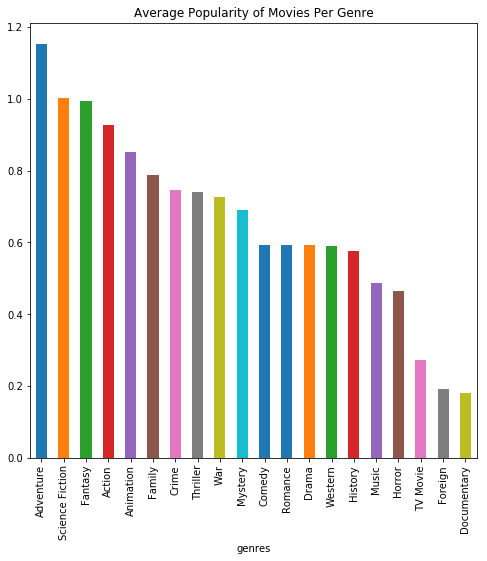

In [24]:
# sort and plot data for the average of popularity of each genre
df_genre_mean.popularity.sort_values(ascending=False).plot(kind = 'bar', title = 'Average Popularity of Movies Per Genre', figsize=(8, 8));


#### The top 3 of most popular movie genres are Adventure, Sciencee Fiction and Fantasy.

### Research Question 4: Which genres have higher budget and revenue?

In [25]:
# for better comparison and visualization, we can use million format for "budget_adj", "revenue_adj" and "gross" variables

df_genre_mean ['budget_adj_million'] = df_genre_mean['budget_adj']/1000000
df_genre_mean.drop(['budget_adj'], axis=1, inplace = True)

df_genre_mean ['revenue_adj_million'] = df_genre_mean['revenue_adj']/1000000
df_genre_mean.drop(['revenue_adj'], axis=1, inplace = True)

df_genre_mean ['gross_million'] = df_genre_mean['gross']/1000000
df_genre_mean.drop(['gross'], axis=1, inplace = True)

# view and check changes
df_genre_mean.head()


,popularity,vote_count,vote_average,release_year,budget_adj_million,revenue_adj_million,gross_million
genres,,,,,,,
Action,0.926274,392.993708,5.787752,2000.056208,32.960109,91.758272,58.798162
Adventure,1.154259,513.125085,5.940585,1999.388851,43.937335,141.675228,97.737893
Animation,0.852182,303.000000,6.403147,2003.995708,25.295350,85.256127,59.960777
Comedy,0.592607,176.436330,5.905167,2000.816240,15.920314,47.897001,31.976688
Crime,0.744930,278.805022,6.124889,1999.491137,21.533513,56.636410,35.102897


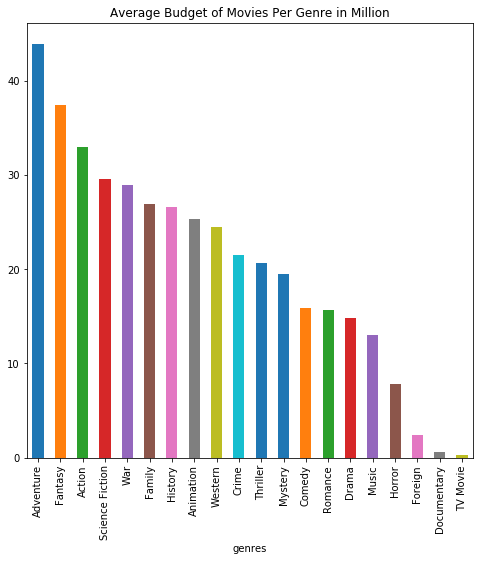

In [26]:
# sort and plot data for the average of budget of each genre
df_genre_mean.budget_adj_million.sort_values(ascending=False).plot(kind = 'bar', title = 'Average Budget of Movies Per Genre in Million', figsize=(8, 8));


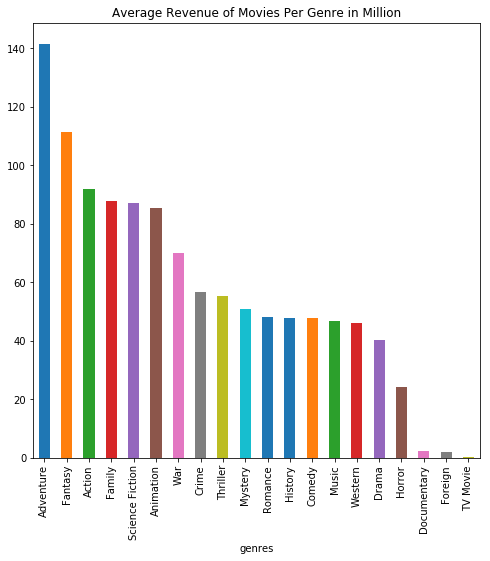

In [27]:
# sort and plot data for the average of revenue of each genre
df_genre_mean.revenue_adj_million.sort_values(ascending=False).plot(kind = 'bar', title = 'Average Revenue of Movies Per Genre in Million', figsize=(8, 8));


#### Both top 3 movie genres that having higher average budget and revenue are Adventure, Fantasy and Action.

### Research Question 5: Which genres have higher profit?

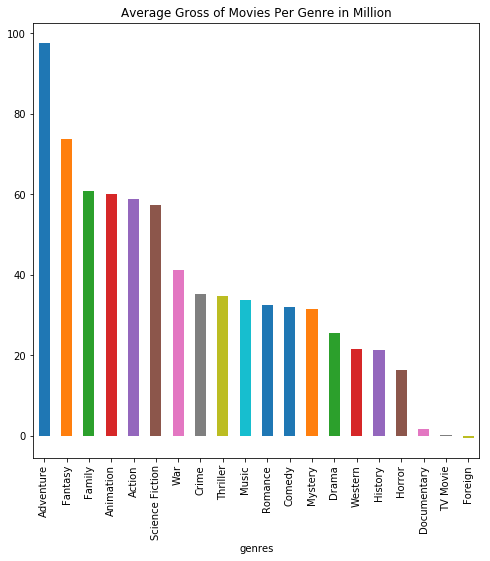

In [28]:
# sort and plot data for the averaage gross of each genre
df_genre_mean.gross_million.sort_values(ascending=False).plot(kind = 'bar', title = 'Average Gross of Movies Per Genre in Million', figsize=(8, 8));


#### The top 3 movie genres that having higher average profit  are Adventure, Fantasy and Family.

### Research Question 6: Which genres have higher rating?

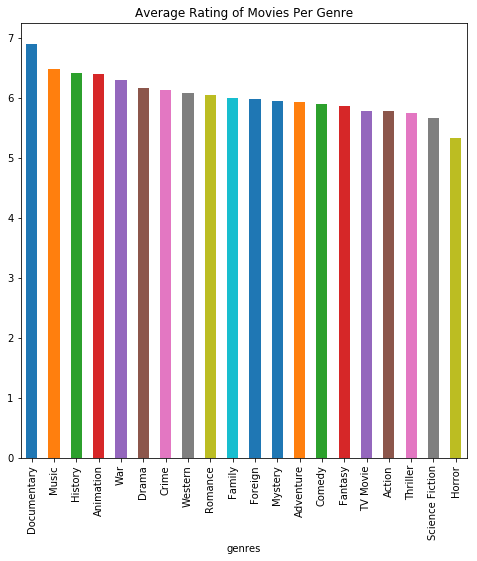

In [29]:
# sort and plot data for the average voting rate of each genre
df_genre_mean.vote_average.sort_values(ascending=False).plot(kind = 'bar', title = 'Average Rating of Movies Per Genre', figsize=(8, 8));


#### The top 3 movie genres that having higher average voting rate are Documentary, Music and History.

### Research Question 7: In general, does higher popularity have higher rating?

In [30]:
# we can use the dataset that before spliting the genres since we are looking for the relationship between polularity and average vote of each movie
df_genres.head(3)


,popularity,original_title,genres,vote_count,vote_average,release_year,budget_adj,revenue_adj,gross
0,32.985763,Jurassic World,Action|Adventure|Science Fiction|Thriller,5562,6.5,2015,1.379999e+08,1.392446e+09,1.254446e+09
1,28.419936,Mad Max: Fury Road,Action|Adventure|Science Fiction|Thriller,6185,7.1,2015,1.379999e+08,3.481613e+08,2.101614e+08
2,13.112507,Insurgent,Adventure|Science Fiction|Thriller,2480,6.3,2015,1.012000e+08,2.716190e+08,1.704191e+08


In [31]:
df_genres.describe()

,popularity,vote_count,vote_average,release_year,budget_adj,revenue_adj,gross
count,10842.000000,10842.000000,10842.000000,10842.000000,1.084200e+04,1.084200e+04,1.084200e+04
mean,0.647461,217.823649,5.974064,2001.314794,1.758712e+07,5.147797e+07,3.389085e+07
std,1.001032,576.180993,0.934257,12.813617,3.433437e+07,1.447723e+08,1.253424e+08
min,0.000065,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00,-4.139124e+08
25%,0.208210,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00,0.000000e+00
50%,0.384532,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00,0.000000e+00
75%,0.715393,146.000000,6.600000,2011.000000,2.092507e+07,3.387838e+07,1.308384e+07
max,32.985763,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09,2.750137e+09


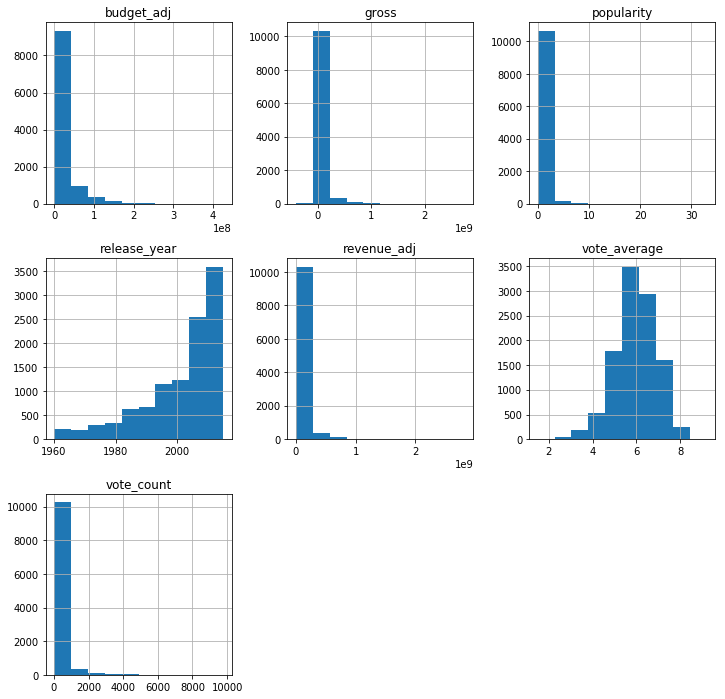

In [32]:
# Histograms for Various Features
df_genres.hist(figsize= (12,12));

#### It's quite obvious to see that all variables are skewed except one variable is closed to a normal distribution, which is "vote_average". 

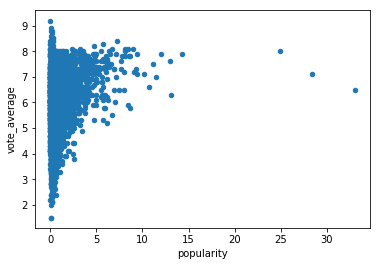

In [33]:
# plot relationship between polularity and average vote for each movie
df_genres.plot (x = 'popularity', y='vote_average', kind = 'scatter');

#### From the plot, there is no clear linear postive relationship between a movie's  popularity and its vote average. Also, many movies were rated around 6, which is very close to its mean and median (see above description table).

### Research Question 8: In general, does higher popularity have higher profit?

In [34]:
# for better comparison and visualization, we can use million format for variable "gross" 

df_genres ['gross_million'] = df_genres['gross']/1000000
df_genres.drop(['gross'], axis=1, inplace = True)

df_genres.head(3)


,popularity,original_title,genres,vote_count,vote_average,release_year,budget_adj,revenue_adj,gross_million
0,32.985763,Jurassic World,Action|Adventure|Science Fiction|Thriller,5562,6.5,2015,1.379999e+08,1.392446e+09,1254.445953
1,28.419936,Mad Max: Fury Road,Action|Adventure|Science Fiction|Thriller,6185,7.1,2015,1.379999e+08,3.481613e+08,210.161353
2,13.112507,Insurgent,Adventure|Science Fiction|Thriller,2480,6.3,2015,1.012000e+08,2.716190e+08,170.419070


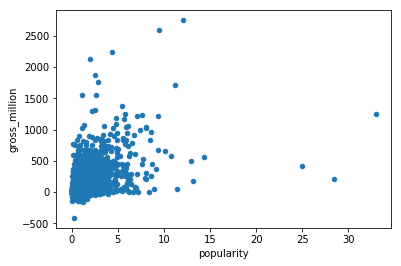

In [35]:
# plot relationship between polularity and average vote for each movie
df_genres.plot (x = 'popularity', y='gross_million', kind = 'scatter');

#### From the plot, we can see the popularity and profit have a moderate linear postive relationship even though their correlation coefficient is unknown at this moment.

<a id='conclusions'></a>
## Conclusions

> 1. The 3 most popular movies are Adventure, Sciencee Fiction and Fantasy, and the 3 movie genres with higher average profit are Adventure, Fantasy and Family. Therefore, based on this trend, if you want to produce or investment a movie, Adventure and Fantasy movies are solid choices. However, you might also need to have sufficient capital due to high costs of production.
> 2. Documentary, Music and History are the top 3 movie genres that having high average voting rate, however, they have pretty low popularity.
> 3. Drama, Comedy and Thriller are the top 3 movie genres that produced the most from year to year due to low producation cost/budget.
> 4. Movies with high popularity are likely to bring high profitability.



## Submitting your Project 

> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [36]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0